## **Cluster Grouping on Student Table**

In [ ]:
import pandas as pd


In [ ]:
## dataset is output from Clean&MergeCombined.Rmd called Student_Table
df = pd.read_csv('https://raw.githubusercontent.com/beachha/616finalproject/refs/heads/main/Student_Table.csv')

In [ ]:
df.columns
## check columns

Index(['Student.ID', 'Enrolled.Student.Count', 'maxCredits', 'DegreeObtained',
       'Major', 'StartingTerm', 'MostRecentTerm', 'Cum.UG.Crs.GPA',
       'FirstSemester', 'AdvancedClasses', 'ChangedMajor', 'PrimaryTermCount',
       'TwoMajors'],
      dtype='object')

In [ ]:
# prompt: drop record where max credits isn't numeric

# Convert 'Max Credits' column to numeric, coercing errors to NaN
df['maxCredits'] = pd.to_numeric(df['maxCredits'], errors='coerce')

# Drop rows where 'Max Credits' is NaN (originally non-numeric)
df = df.dropna(subset=['maxCredits'])



In [ ]:
df.shape

(1017, 13)

In [ ]:
# prompt: Drop rows where maxCredits is over 120 and put them in another dataframe named df2
## to artificaily  help the clustering remove student over 100 credits: they are clearly seniors,
## but they skew the Credit Hours data an lead to group that are unreflective of Student Class
df2 = df[df['maxCredits'] > 100]
df = df[df['maxCredits'] <= 100]
df2


,Student.ID,Enrolled.Student.Count,maxCredits,DegreeObtained,Major,StartingTerm,MostRecentTerm,Cum.UG.Crs.GPA,FirstSemester,AdvancedClasses,ChangedMajor,PrimaryTermCount,TwoMajors
232,8130203,1,126.0,0,BA Major,202310.0,202510.0,3.81,0,0,1,5,1
255,8142155,1,102.0,0,BA Major,202310.0,202510.0,3.86,0,0,0,5,0
258,8142526,1,110.0,0,BA Major,202310.0,202510.0,3.01,0,0,0,5,0
264,8143654,1,111.0,0,CAS,202310.0,202510.0,3.99,0,0,1,5,0
270,8144902,1,110.0,1,BA Major,202310.0,202510.0,3.52,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,8429284,1,151.5,1,BA Major,201810.0,202020.0,3.20,0,0,1,6,1
1020,8458965,1,152.0,1,Accountancy,201610.0,201920.0,0.00,1,1,0,8,1
1021,8476995,1,136.0,1,Accountancy,201610.0,201920.0,3.61,0,1,0,8,1
1022,8521298,1,163.0,1,Accountancy,201510.0,201820.0,0.00,1,1,1,8,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Select relevant columns for clustering
## Term count and credits are our best predictors
features = df[[ 'maxCredits','PrimaryTermCount']]  # Replace with your actual feature columns

# Step 2: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply K-Means clustering with 4 clusters: they will later be mapped to student class
kmeans = KMeans(n_clusters=4, random_state = 42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 4: Display the DataFrame with the new 'Cluster' column
print(df.head(50))

   Student.ID Enrolled.Student.Count  maxCredits  DegreeObtained     Major  \
0     8023864                      1         0.0               0  BA Major   
1     8024720                      1         0.0               0  BA Major   
2     8026176                      1         3.0               0  BA Major   
4     8034088                      1         7.0               0  BA Major   
5     8035324                      1         4.0               0  BA Major   
6     8035775                      1        32.0               0  BA Major   
7     8035951                      1         0.0               0  BA Major   
8     8036132                      1         0.0               0  BA Major   
9     8036194                      1        26.0               0  BA Major   
10    8036672                      1        17.0               0  BA Major   
11    8036698                      1         1.0               0  BA Major   
12    8036831                      1         0.0               0

## **Generating rules of classification**

* Currently we have cluster of similar groups of student but we need a standardized set of rules

* We will use a Decision Tree to find the optimal rules for our student clusters

Accuracy of Decision Tree model: 98.15%


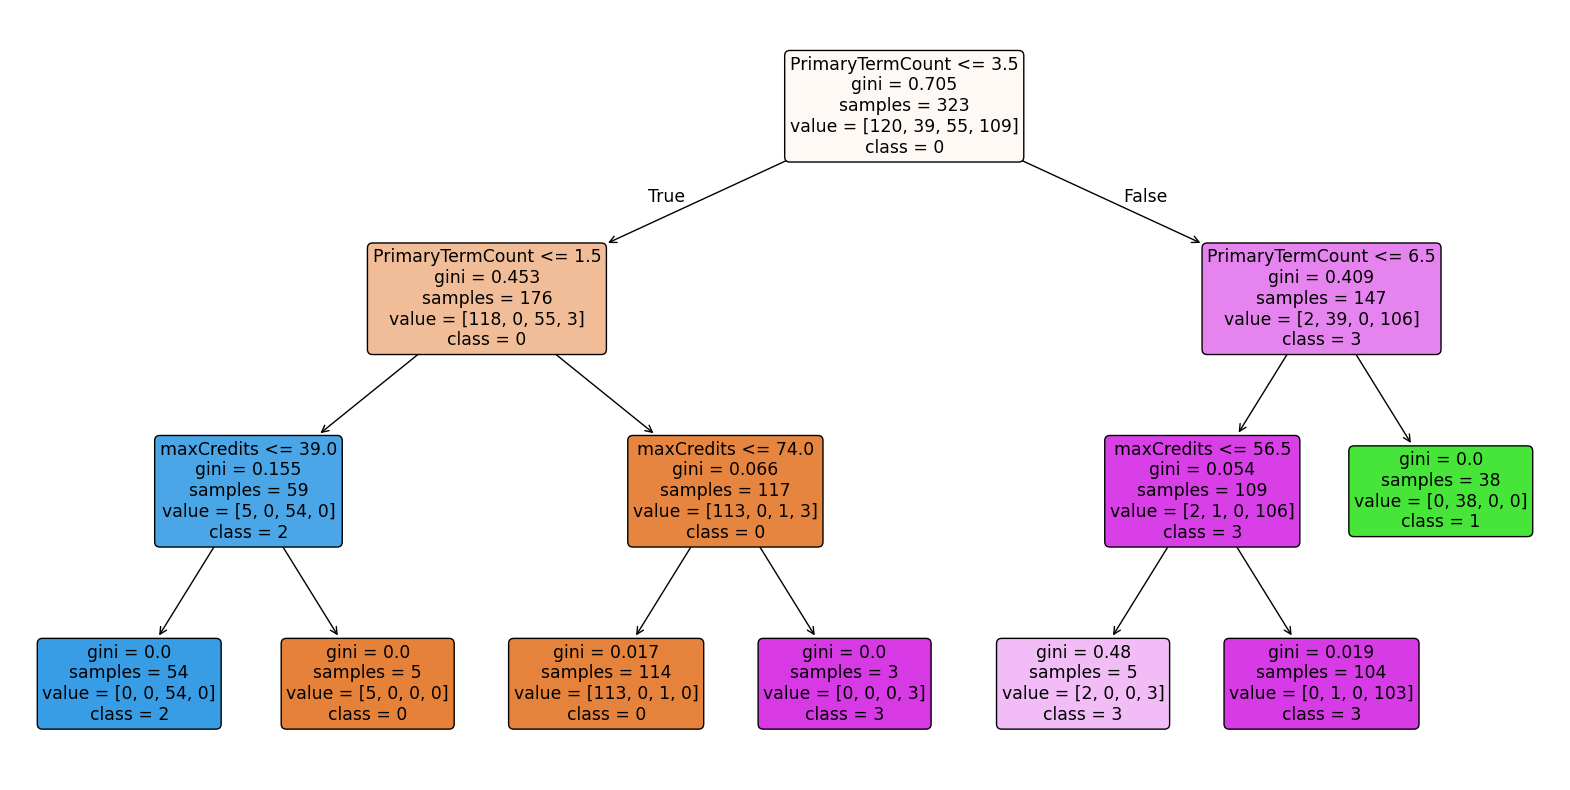

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Prepare the data (Set 'Cluster' as y, and the rest as X)
X = df[['maxCredits', 'Cum.UG.Crs.GPA', 'FirstSemester', 'AdvancedClasses', 'ChangedMajor', 'PrimaryTermCount',
       'TwoMajors']]  # Features
y = df['Cluster']  # Target variable

# Step 2: Split the data into train and test (25% test, 75% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Step 3: Train a Decision Tree Classifier with max_depth=3
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 5: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy * 100:.2f}%")

# Step 6: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], filled=True, rounded=True)
plt.show()


In [ ]:
# prompt: crate a fcsv file from df

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code
df.to_csv('output.csv', index = False)  # Save to a CSV file named 'output.csv'

# Save to CSV
df.to_csv('output.csv', index = False)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# prompt: I want to Change the Mapping of the cluster into a categorical variable. Map cluster: 1 to Senior, cluster: 0  to Sophomore, Map cluster: 2 to Freshman, and Cluster: 3 to Junior

# Create the mapping dictionary
cluster_mapping = {
    1: 'Senior',
    0: 'Sophomore',
    2: 'Freshman',
    3: 'Junior'
}

# Use the map function to create the new 'StudentYear' column
df['StudentYear'] = df['Cluster'].map(cluster_mapping)

# Display the DataFrame with the new 'StudentYear' column
print(df.head(50))

   Student.ID Enrolled.Student.Count  maxCredits  DegreeObtained     Major  \
0     8023864                      1         0.0               0  BA Major   
1     8024720                      1         0.0               0  BA Major   
2     8026176                      1         3.0               0  BA Major   
4     8034088                      1         7.0               0  BA Major   
5     8035324                      1         4.0               0  BA Major   
6     8035775                      1        32.0               0  BA Major   
7     8035951                      1         0.0               0  BA Major   
8     8036132                      1         0.0               0  BA Major   
9     8036194                      1        26.0               0  BA Major   
10    8036672                      1        17.0               0  BA Major   
11    8036698                      1         1.0               0  BA Major   
12    8036831                      1         0.0               0

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame from the previous code
#df.to_csv('output.csv', index = False)  # Save to a CSV file named 'output.csv'

# Save to CSV
df.to_csv('Classes.csv', index = False)



Accuracy of Decision Tree model: 98.15%


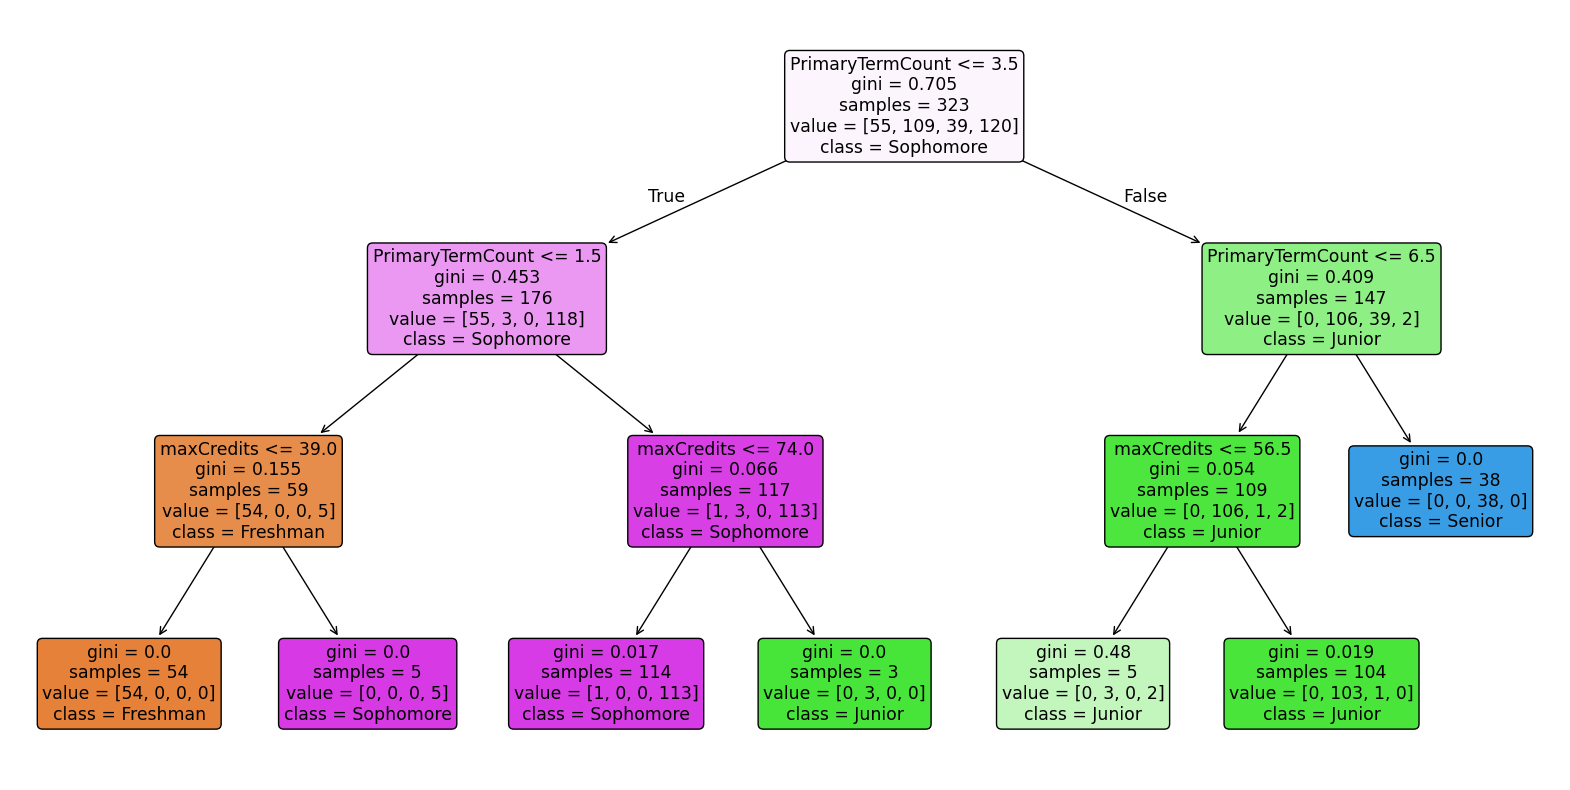

In [ ]:
## Decision Tree with class labels for ease of viewing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Prepare the data (Set 'Cluster' as y, and the rest as X)
X = df[['maxCredits', 'Cum.UG.Crs.GPA', 'FirstSemester', 'AdvancedClasses', 'ChangedMajor', 'PrimaryTermCount',
       'TwoMajors']]  # Features
y = df['StudentYear']  # Target variable

# Step 2: Split the data into train and test (25% test, 75% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Step 3: Train a Decision Tree Classifier with max_depth=3
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 5: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy * 100:.2f}%")

# Step 6: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], filled=True, rounded=True)
plt.show()


## **Returning Removed Students**

In [ ]:
##Student with over 100 credits are mapped to Senior and returned to the dataset

# Create the mapping dictionary
cluster_mapping = {
    1: 'Senior',
    0: 'Sophomore',
    2: 'Freshman',
    3: 'Junior'
}
# Assign all students in df2 to cluster 1
df2['Cluster'] = 1
# Use the map function to create the new 'StudentYear' column
df2['StudentYear'] = df2['Cluster'].map(cluster_mapping)

In [ ]:
# prompt: merge df2 back into df and assign all students in df2 into cluster 1



# Concatenate df and df2
df = pd.concat([df, df2], ignore_index=True)

##df

## **The remaining Code is creating visuals only to be used for analysis**

* This data Is used to Create rules of classificiation, those rules will be Applied to another dataset

In [ ]:
# prompt: Generate a table That displays counts of student in Each StudentYear, but only for student whose MostRecentTerm is 202510 , order the table Freshman, Sophomore, junior , senior

# Assuming 'df' is your DataFrame from the previous code
# Filter for students whose MostRecentTerm is 202510
df_filtered = df[df['MostRecentTerm'] == 202510]

# Define the order of StudentYear categories
student_year_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']

# Create the table using value_counts() and reindex for desired order
student_counts = df_filtered['StudentYear'].value_counts().reindex(student_year_order, fill_value=0)

# Display the table
student_counts

,count
StudentYear,
Freshman,74
Sophomore,136
Junior,131
Senior,191


In [ ]:
df_filteredBA = df_filtered[df_filtered['Major'] == 'BA Major']
# Create the table using value_counts() and reindex for desired order
student_countsBA = df_filteredBA['StudentYear'].value_counts().reindex(student_year_order, fill_value=0)

# Display the table
student_countsBA

,count
StudentYear,
Freshman,74
Sophomore,100
Junior,86
Senior,100


In [ ]:
df_filteredIS = df_filtered[df_filtered['Major'] == 'IS Major']
# Create the table using value_counts() and reindex for desired order
student_countsIS = df_filteredIS['StudentYear'].value_counts().reindex(student_year_order, fill_value=0)

# Display the table
student_countsIS

,count
StudentYear,
Freshman,0
Sophomore,4
Junior,5
Senior,16


In [ ]:
# prompt: just like last table but include student in Major: Cybersecurity Mgt Major as well as IS Majors

#df_filteredCybersecurity = df_filtered[df_filtered['Major'] == 'Cybersecurity Mgt Major']
# Create the table using value_counts() and reindex for desired order
#student_countsCybersecurity = df_filteredCybersecurity['StudentYear'].value_counts().reindex(student_year_order, fill_value=0)

# Display the table
#student_countsCybersecurity

# Combine the counts for IS and Cybersecurity majors
#combined_counts = student_countsIS + student_countsCybersecurity

# Display the combined counts
#combined_counts

,count
StudentYear,
Freshman,0
Sophomore,8
Junior,5
Senior,22


In [ ]:
# prompt: display a table with Student.ID, Credits,  PrimaryTermCount, and Class for 10 random students

import pandas as pd

# Load the DataFrame (assuming 'df' is already loaded as in your provided code)
# ... your existing code to load and process the dataframe ...

# Sample 10 random students
sampled_df = df_filtered.sample(n=10, random_state=42) #Setting random_state for reproducibility

# Display the table with selected columns
display(sampled_df[['Student.ID', 'maxCredits', 'PrimaryTermCount', 'StudentYear']])

,Student.ID,maxCredits,PrimaryTermCount,StudentYear
6,8035951,0.0,1,Freshman
530,8199524,119.0,7,Senior
104,8098459,48.0,3,Sophomore
528,8199244,110.0,7,Senior
489,8191633,114.0,7,Senior
231,8136901,60.0,5,Junior
249,8143420,92.0,5,Junior
474,8188376,141.0,7,Senior
367,8189159,91.0,7,Senior
72,8063741,24.0,1,Freshman


In [ ]:
# prompt: create a table were the rows are MostRecentTerm and the values are counts of students with DegreeObtained: 1. only count student with Major: BA Major

# Assuming 'df' is your DataFrame from the previous code
# Filter for students with Major: 'BA Major' and DegreeObtained: 1
df_ba_graduated = df[(df['Major'] == 'BA Major') & (df['DegreeObtained'] == 1)]

# Group by MostRecentTerm and count the number of students
term_counts = df_ba_graduated.groupby('MostRecentTerm').size().reset_index(name='Count')

# Display the table
term_counts

,MostRecentTerm,Count
0,202020.0,1
1,202110.0,4
2,202120.0,44
3,202210.0,2
4,202220.0,41
5,202310.0,7
6,202320.0,58
7,202410.0,15
8,202420.0,43
9,202510.0,76


In [ ]:
# Assuming 'df' is your DataFrame from the previous code
# Filter for students with Major: 'BA Major' and DegreeObtained: 1
df_is_graduated = df[(df['Major'] == 'IS Major') & (df['DegreeObtained'] == 1)]

# Group by MostRecentTerm and count the number of students
term_countsIS = df_is_graduated.groupby('MostRecentTerm').size().reset_index(name='Count')

# Display the table
term_countsIS

,MostRecentTerm,Count
0,202110.0,2
1,202120.0,32
2,202210.0,1
3,202220.0,31
4,202310.0,1
5,202320.0,33
6,202410.0,4
7,202420.0,17
8,202510.0,15
